In [5]:
import dbcp
import pandas as pd
import numpy as np

In [2]:
eng = dbcp.helpers.get_sql_engine()

In [12]:
query = """
SELECT
    ec.county_id_fips,
    brownfield_acreage_mean_fill / fips.land_area_km2 as brownfield_mean_frac,
    brownfield_acreage_median_fill / fips.land_area_km2 as brownfield_median_frac,
    brownfield_acreage / fips.land_area_km2 as brownfield_frac,
    (coal_qualifying_area_fraction / fips.land_area_km2) as coal_closure_frac,
    qualifies_by_employment_criteria as ec_qualifies_via_employment,
    fips.land_area_km2,
    fips.county_name
FROM data_warehouse.energy_communities_by_county AS ec
LEFT JOIN data_warehouse.county_fips AS fips
USING (county_id_fips)
"""
ec = pd.read_sql(query, eng)

In [13]:
ec.head()

,county_id_fips,brownfield_mean_frac,brownfield_median_frac,brownfield_frac,coal_closure_frac,ec_qualifies_via_employment,land_area_km2,county_name
0,31039,0.005346,0.005346,0.005346,0.0,False,1477.645345,Cuming
1,31109,0.791675,0.268062,0.263540,0.0,False,2169.272970,Lancaster
2,31129,0.000510,0.000510,0.000510,0.0,False,1489.645185,Nuckolls
3,46099,0.647978,0.285610,0.282481,0.0,False,2089.701444,Minnehaha
4,48327,0.163464,0.001400,0.000000,0.0,False,2336.237980,Menard


In [14]:
bf_cols = [
    'brownfield_frac',
    'brownfield_mean_frac',
    'brownfield_median_frac',
]

In [15]:
ec['brownfield_frac'].nlargest(5)  # lol

677     346.846649
866     324.752869
1492    255.102000
578     254.003205
362     245.634213
Name: brownfield_frac, dtype: float64

array([[<AxesSubplot: title={'center': 'brownfield_frac'}>,
        <AxesSubplot: title={'center': 'brownfield_mean_frac'}>],
       [<AxesSubplot: title={'center': 'brownfield_median_frac'}>,
        <AxesSubplot: >]], dtype=object)

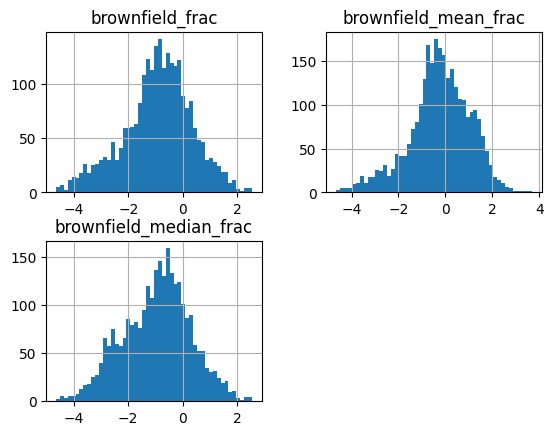

In [18]:
# this data is garbage.
ec[bf_cols].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [19]:
ec[bf_cols].gt(1.0).agg(['sum', 'mean'])

,brownfield_frac,brownfield_mean_frac,brownfield_median_frac
sum,554.000000,1186.000000,587.000000
mean,0.189272,0.405193,0.200547


In [10]:
ec['brownfield_frac'].nlargest(5)  # lol

1223    5053.711767
629     3402.311729
2051    1886.194120
434     1501.566178
1501    1318.804306
Name: brownfield_frac, dtype: float64

<AxesSubplot: >

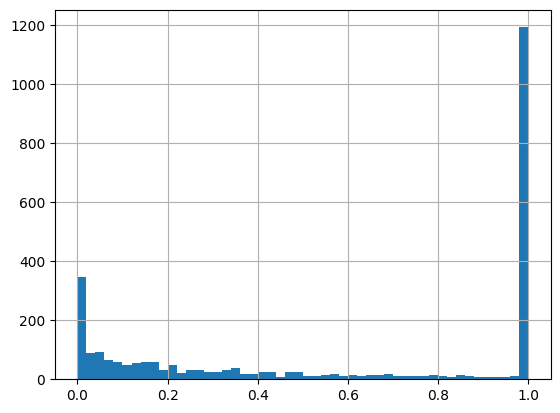

In [11]:
ec['brownfield_frac'].clip(upper=1.0).replace(0, np.nan).hist(bins=50)